# Linear Regression Regularization

## I. Linear Regression Basics

Linear regression is a tool often underrated tool in the machine learning toolkit. I cannot give linear models the treatment they deserve in this article, but I will give a brief overview. Linear models assume a model of the form:

$y_i = \beta_0 + \beta_1 x_{i1} + + \beta_2x _{i2} + ... + \beta_k x_{ik} + \epsilon_i$

where $y_i$ is the label of the *i*-th observation,  $\hat{\beta}_j$ is the coefficient for the *j*-th variable, $x_{ij}$ is the value for the *j*-th variable for the *i*-th observation, and $\epsilon_i$ is the error for the *i*-th observation.

Some assumptions about $\epsilon_i$ make linear regression particularly useful when fitting it when minimizing sum of squared residuals (SSR), which is equivalent to minimizing the mean squared error (MSE). These are the assumptions of [Gauss-Markov Theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem). Again, I am not providing a deep dive of OLS models here because they require much more attention, but you should be aware it.

Although the sum of squared residuals (SSR) is the most common loss function in linear regression, there are others. There are alternatives such as [Least Absolute Deviation](https://en.wikipedia.org/wiki/Least_absolute_deviations) and [Huber Loss](https://en.wikipedia.org/wiki/Huber_loss), which are less sensitive to outliers. Their details are not discussed here, but you should review them so you have them in your toolkit.

The loss function in matrix form is:

# $\text{min } (y - X\hat{\beta})^T(y - X\hat{\beta})$

where $y$ is the column vector of true values, $X$ is the design matrix, and $\hat{\beta}$ is the column vector of coefficient estimates in the linear model. A design matrix has rows representing observations and columns representing variables, typically the first column is all 1s for the intercept term.

Using summation notation, the loss function is:

# $\text{min } \Sigma_{i=1}^n (y_i - \Sigma^k_{j=1} (\hat{\beta}_j x_{ij}))^2$

where $y_i$ is the label for the *i*-th observation, $\hat{\beta}_j$ is the estimated coefficient for the *j*-th variable, and $x_{ij}$ is the value for the  *j*-th variable for the *i*-th observation.

When minimizing the SSR, we have an analytical solution called the normal equations:

Expanding $(y - X\hat{\beta})^T(y - X\hat{\beta})$ we get:

# $\epsilon^T \epsilon = y^Ty - 2\hat{\beta}^T X^T y + \hat{\beta}^TX^TX\hat{\beta}$

Our loss function will be at a local minima (or maxima) when the first derivative with respect to the estimated coefficients is zero. Taking the first derivative of the loss with respect to the coefficients we have:

# $\frac{d \epsilon^T \epsilon}{d\hat{\beta}} = - 2 X^T y + 2 X^TX\hat{\beta}$

Setting the derivative of our loss to zero we get:

# $0 = - 2 X^T y + 2 X^TX\hat{\beta}$

Now we can start solving for the coefficient vector. First we move the $-2 X^T y$ from the left side to the right.

# $2 X^T y = 2 X^TX\hat{\beta}$

Now we can divide away the $2$s.

# $X^T y = X^TX\hat{\beta}$

# $(X^TX)^{-1}X^T y = \hat{\beta}$

In [5]:
import numpy as np
from LinearModel import OLS, Ridge
import matplotlib.pyplot as plt

size = 2000
cols = 3
eta = 1

def make_datasets(size, cols, num_zero=0, beta_scale=1., intercept=1., eta=1., seed=1):
    np.random.seed(seed)
    
    X = np.random.normal(loc=0, scale=1, size=(size,cols))
    beta = np.random.normal(loc=0, scale=beta_scale, size=cols)
    
    if num_zero != 0.:
        beta_indices = np.arange(0, beta.shape[0], 1)
        zero_indices = np.random.choice(beta_indices, num_zero, replace=False)
        beta[zero_indices] = 0
    
    y = intercept + np.matmul(X, beta) + np.random.normal(loc=0, 
                                                          scale=eta, 
                                                          size=size) 
    X_train = X[:round(size/2),:]
    y_train = y[:round(size/2)]  
    X_test = X[round(size/2):,:]
    y_test = y[round(size/2):] 
    
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = make_datasets(size, cols, num_zero=1, beta_scale=1., eta=1)

In [2]:
my_ols = OLS()
my_ols.fit(X_train, y_train)  

print(f"Model df: {my_ols.df_model}")
print(f"Residual df: {my_ols.df_residuals}")
print(f"R-squared: {round(my_ols.R_sq, 4)}")
print(f"Adj. R-squared: {round(my_ols.adj_R_sq, 4)}")
print(f"F-stat: {round(my_ols.F_stat, 4)}")
print(f"F-prob: {round(my_ols.F_prob, 4)}")
print(f"Est. Coef.: {np.round(my_ols.beta_hat, 4)}")
print(f"Est. Coef. Std. Error: {np.round(my_ols.beta_hat_se, 4)}")
print(f"t-stats: {np.round(my_ols.beta_hat_t_stats, 4)}")
print(f"P(|t-stat| > 0): {np.round(my_ols.beta_hat_prob, 4)}")

Model df: 3
Residual df: 996
R-squared: 0.9002
Adj. R-squared: 0.8999
F-stat: 2993.9391
F-prob: 0.0
Est. Coef.: [ 0.9893 -2.8303  0.7886 -0.035 ]
Est. Coef. Std. Error: [0.0311 0.0315 0.0304 0.0319]
t-stats: [ 31.8331 -89.7663  25.9239  -1.0985]
P(|t-stat| > 0): [0.     0.     0.     0.2722]


# L2-Norm Regularization (Ridge Regression)

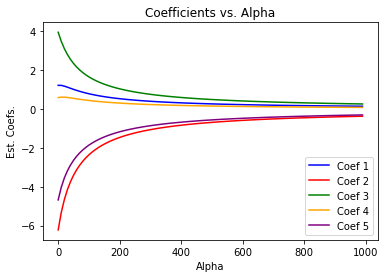

In [7]:
X_train, y_train, X_test, y_test = make_datasets(100, 5, num_zero=0, beta_scale=4., eta=1, seed=2)

coef_1, coef_2, coef_3, coef_4, coef_5 = [], [], [], [], []

alphas = np.arange(0., 1000., 10)
for alpha in alphas:
    my_ridge = Ridge()
    my_ridge.fit(X_train, y_train, alpha=alpha) 

    for i in range(len(my_ridge.beta_hat)):
        beta_hat = my_ridge.beta_hat[i]
        if i == 0:
            coef_1.append(beta_hat)
        elif i == 1:
            coef_2.append(beta_hat)
        elif i == 2:
            coef_3.append(beta_hat)
        elif i == 3:
            coef_4.append(beta_hat)
        else:
            coef_5.append(beta_hat)
        
plt.plot(alphas, coef_1, color="blue", label="Coef 1")
plt.plot(alphas, coef_2, color="red", label="Coef 2")
plt.plot(alphas, coef_3, color="green", label="Coef 3")
plt.plot(alphas, coef_4, color="orange", label="Coef 4")
plt.plot(alphas, coef_5, color="purple", label="Coef 5")
plt.title("Coefficients vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Est. Coefs.")
plt.legend(loc="lower right")
plt.show()